In [2]:
# 1
import pandas as pd
data = pd.read_csv('StudentsPerformance.csv')

In [3]:
# Mapping to numerical
mapping = {
    "bachelor's degree": 1,
    'some college': 2,
    "master's degree": 3,
    "associate's degree": 4
}

mapping2 = {
    "male": 1,
    "female": 2
}

mapping3 = {
    "group A": 1,
    "group B": 2,
    "group C": 3,
    "group D": 4,
    "group E": 5
}

# Encoding
data['encoded_education_level'] = data['parental level of education'].map(mapping)
data['encoded_gender'] = data['gender'].map(mapping2)
data['encoded_race'] = data['race/ethnicity'].map(mapping3)

In [4]:
#creating new feature total_score
data["Total_Score"] = data["math score"] + data["reading score"] + data["writing score"]

In [5]:
# Dropping NaN values
data = data.dropna()

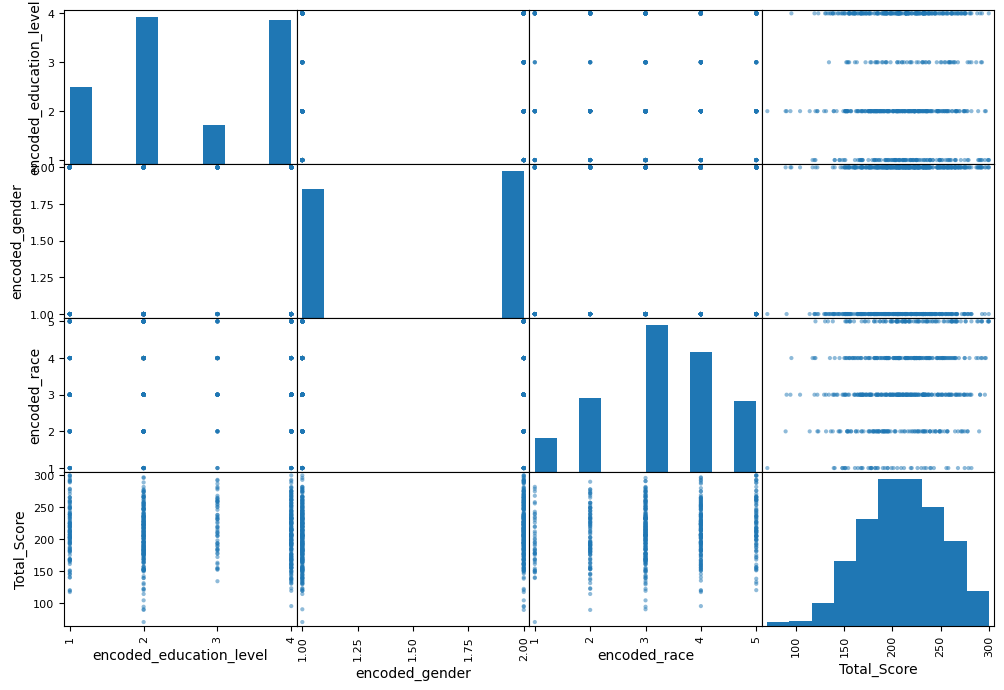

In [6]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

attributes = ["encoded_education_level", "encoded_gender" , "encoded_race", "Total_Score"]

scatter_matrix(data[attributes], figsize=(12, 8))
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

# Splitting data into train and test sets
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [8]:
# 2 Prepare training data
X_train = train_set[["Total_Score", "encoded_gender" , "encoded_race"]]
y_train = train_set["encoded_education_level"]

Discussion:

I picked for X (independent variable) "Total_Score", "encoded_gender" and "encoded_race" and for y (dependent variable/ target feature) "encoded_education_level" because to determine the parental education level I thought the Total score of the student, their gender and race will play a factor in determining it.

In [9]:
# 3
from sklearn.tree import DecisionTreeClassifier

tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [10]:
from sklearn.metrics import accuracy_score, precision_score

# Predictions on the training set
y_train_pred = tree_classifier.predict(X_train)

# Predictions on the test set
X_test = test_set[["Total_Score", "encoded_gender", "encoded_race"]]
y_test = test_set["encoded_education_level"]
y_test_pred = tree_classifier.predict(X_test)

# Calculating accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calculating precision
train_precision = precision_score(y_train, y_train_pred, average='weighted')
test_precision = precision_score(y_test, y_test_pred, average='weighted')

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Training Precision:", train_precision)
print("Test Precision:", test_precision)

Training Accuracy: 0.894
Test Accuracy: 0.296
Training Precision: 0.9046901458182233
Test Precision: 0.33045234708392607


In [11]:
# training
from sklearn.metrics import mean_squared_error

r2 = tree_classifier.score(X_train, y_train)

y_pred = tree_classifier.predict(X_train)
rms_error = mean_squared_error(y_train, y_pred)

print("R-squared:", r2)
print("Root Mean Squared Error:", rms_error)

R-squared: 0.894
Root Mean Squared Error: 0.508


Discussion for training set:

the R-squared value of 0.894 indicates that the decision tree model explains approximately 89.4% of the variance in the training data which suggest that the model does really well. However this might also suggest overfitting as the model does too well.

the RMSE value of 0.508 indicates good model performance as the lower RMSE value the better the model performance

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

X_test = test_set[["Total_Score", "encoded_gender" , "encoded_race"]]
y_test = test_set["encoded_education_level"]

y_pred = tree_classifier.predict(X_test)

r2 = tree_classifier.score(X_test, y_test)
rms_error = mean_squared_error(y_test, y_pred)

print("R-squared:", r2)
print("Root Mean Squared Error:", rms_error)

R-squared: 0.296
Root Mean Squared Error: 2.8


Discussion for comparing testing and training set:

the R-squared value of testing set is 0.312 compared to the r-squared value of the training set (0.894) suggests that the model's performance might have decreased when applied to unseen data. This also suggests that model is Overfitting because of the large gap in the r-squared value between the testing and training set.
The RMSE value is notably higher on the test data compared to the training data. The higher RMSE value on the test data suggests that the model's predictions have more significant errors when applied to unseen data.

In [13]:
# creating a graphical representation of the tree 
from sklearn.tree import export_graphviz

export_graphviz(tree_classifier, out_file="tree.dot")

In [14]:
# 5
from sklearn.svm import SVC

svm_classifier = SVC()
svm_classifier.fit(X_train,y_train)

SVC()

In [15]:
from sklearn.metrics import accuracy_score, precision_score

# Predictions on the training set
y_train_pred_svm = svm_classifier.predict(X_train)

# Predictions on the test set
y_test_pred_svm = svm_classifier.predict(X_test)

# Calculate accuracy
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)

# Calculate precision with zero_division parameter set to 1 to avoid warning
train_precision_svm = precision_score(y_train, y_train_pred_svm, average='weighted', zero_division=1)
test_precision_svm = precision_score(y_test, y_test_pred_svm, average='weighted', zero_division=1)

print("Training Accuracy (SVM):", train_accuracy_svm)
print("Test Accuracy (SVM):", test_accuracy_svm)
print("Training Precision (SVM):", train_precision_svm)
print("Test Precision (SVM):", test_precision_svm)

Training Accuracy (SVM): 0.37
Test Accuracy (SVM): 0.336
Training Precision (SVM): 0.5415566003616636
Test Precision (SVM): 0.49453061224489797


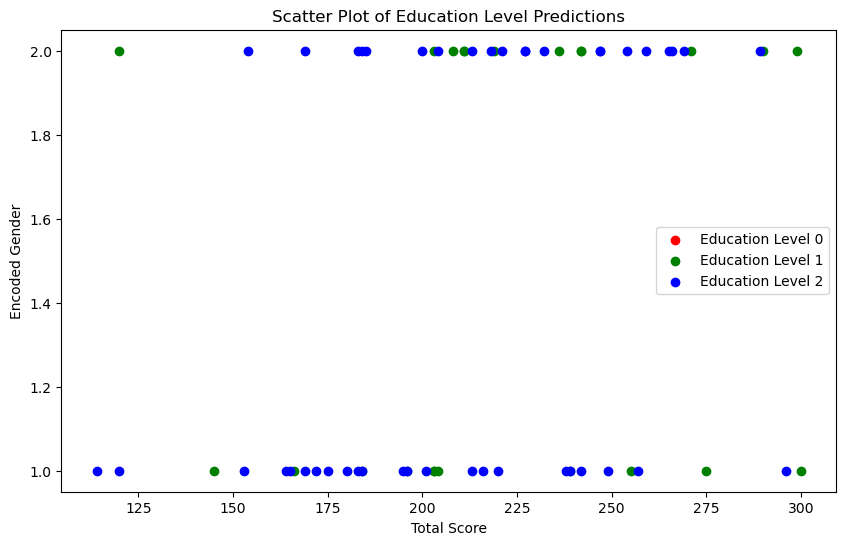

In [16]:

# Create scatter plot
plt.figure(figsize=(10, 6))

# Plot for education level 0
plt.scatter(X_test[y_test == 0]["Total_Score"], X_test[y_test == 0]["encoded_gender"], color='r', label='Education Level 0')
# Plot for education level 1
plt.scatter(X_test[y_test == 1]["Total_Score"], X_test[y_test == 1]["encoded_gender"], color='g', label='Education Level 1')
# Plot for education level 2
plt.scatter(X_test[y_test == 2]["Total_Score"], X_test[y_test == 2]["encoded_gender"], color='b', label='Education Level 2')

plt.title('Scatter Plot of Education Level Predictions')
plt.xlabel('Total Score')
plt.ylabel('Encoded Gender')
plt.legend()
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error
 
# training set
r2 = svm_classifier.score(X_train, y_train)

y_pred = svm_classifier.predict(X_train)
rms_error = mean_squared_error(y_train, y_pred)

print("R-squared:", r2)
print("Root Mean Squared Error:", rms_error)

R-squared: 0.37
Root Mean Squared Error: 2.006


In [18]:
# for testing set
r2 = svm_classifier.score(X_test, y_test)

y_pred = svm_classifier.predict(X_test)
rms_error = mean_squared_error(y_test, y_pred)

print("R-squared:", r2)
print("Root Mean Squared Error:", rms_error)

R-squared: 0.336
Root Mean Squared Error: 2.32


For the SVM classifier:

In the training set, the R-squared value indicates that the SVM model explains approximately 37% of the variance in the training data. This suggests that the model's performance on the training data is moderate, but there is still a substantial amount of unexplained variance. Whereas the r-squared value in testing set drops slightly suggests that the model's performance remains consistent but still moderate when applied to unseen data. The RMSE value on both the training and test set are similar. Overall, The SVM model performs slightly better on the training set compared to the test set, as evidenced by higher R-squared and lower RMSE values on the training data.

Conclusion:

Overall, the decision tree classifier looks to be overfitting looking at the R-squared value of the training set and testing set whereas the SVM model does similar in both training set and testing set with only a slight r-squared value dropping in the testing set.

Comparing the decision tree classifier to the SVM model, the SVM model does better as it is more consistent in both the training and testing set with it's R-squared value and RMSE.

In [19]:
# Doing a svm_linear classifier
from sklearn.svm import SVC

svm_linear = SVC(kernel="linear")
svm_linear.fit(X_train,y_train)

SVC(kernel='linear')

In [20]:
from sklearn.metrics import accuracy_score, precision_score

# Making predictions on the training set
train_predictions = svm_linear.predict(X_train)

# Calculating accuracy and precision for the training set
train_accuracy = accuracy_score(y_train, train_predictions)
train_precision = precision_score(y_train, train_predictions, average='weighted', zero_division=0)  # Set zero_division parameter

# Making predictions on the test set
test_predictions = svm_linear.predict(X_test)

# Calculating accuracy and precision for the test set
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted', zero_division=0)  # Set zero_division parameter

print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)

print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)


Training Accuracy: 0.404
Training Precision: 0.28284000000000004
Test Accuracy: 0.312
Test Precision: 0.2372142857142857


In [21]:
from sklearn.metrics import mean_squared_error
 
# training set
r2 = svm_linear.score(X_train, y_train)

y_pred = svm_linear.predict(X_train)
rms_error = mean_squared_error(y_train, y_pred)

print("R-squared:", r2)
print("Root Mean Squared Error:", rms_error)

R-squared: 0.404
Root Mean Squared Error: 2.174


In [22]:
# for testing set
r2 = svm_linear.score(X_test, y_test)

y_pred = svm_linear.predict(X_test)
rms_error = mean_squared_error(y_test, y_pred)

print("R-squared:", r2)
print("Root Mean Squared Error:", rms_error)

R-squared: 0.312
Root Mean Squared Error: 2.608


In the training set comparing SVM Linear kernel to SVM RBF we can see the Linear kernel does overall better than SVM RBF by looking at the metrics like R-squared value and RMSE as the Linear kernel has overall lower R-squared value. 

Whereas in the testing set the SVM RBF kernel does slighty better than Linear kernel with SVM RBF having R-squared value of 0.336 and Linear kernel having 0.312

Overall the R-squared value gap in SVM RBF classifier is lower which makes it more consistent that the linear kernel classifier so I would prefer the SVM RBF classifier over the linear kernel classifier.

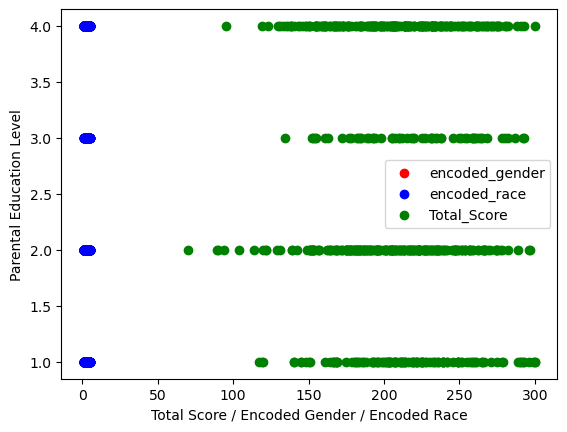

In [23]:
import matplotlib.pyplot as plt

# Scatter plot for encoded_gender vs encoded_education_level with red color
plt.scatter(data["encoded_gender"], data["encoded_education_level"], c='r', label='encoded_gender')

# Scatter plot for encoded_race vs encoded_education_level with blue color
plt.scatter(data["encoded_race"], data["encoded_education_level"], c='b', label='encoded_race')

# Scatter plot for Total_Score vs encoded_education_level with green color
plt.scatter(data["Total_Score"], data["encoded_education_level"], c='g', label='Total_Score')

plt.xlabel("Total Score / Encoded Gender / Encoded Race")
plt.ylabel("Parental Education Level")
plt.legend()
plt.show()
